#### Emily Wang | Choose Your Own Adventure: San Francisco Crime Classification | Data Science 2016

We're working with spatial data... Do map visualization libraries exist?
* [DataMaps (javascript)](http://datamaps.github.io/)
* [Google Maps Visualization Library (javascript)](https://developers.google.com/maps/documentation/javascript/visualization)
* [Unfolding (processing and java)](http://unfoldingmaps.org/)

Alright... python tools!
* [Intro to Basemap](http://introtopython.org/visualization_earthquakes.html) 
* [Vincent](http://wrobstory.github.io/2013/04/python-maps-choropleth.html)
* [reddit question](https://www.reddit.com/r/Python/comments/1onpe2/how_to_plot_data_onto_maps_in_python/)
* [stackoverflow question](http://stackoverflow.com/questions/9018607/library-for-map-visualization)

Okay. Let's import the data and do some things with pandas, and then look into the map visualization libraries I found in this quick Google search. 

First, let's think of some helper functions that we might reuse in several notebooks... We can come back to this cell later and update it.

In [64]:
def clean_data():
    # I realize that this may be different for every iteration, 
    # and we'll figure out some way to specify which "cleaning" is desired for a particular code block. 
    return

# Normalizing the values of a column
# series.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

def start_map():
    # Some code to help initialize a map visualization
    return

Also, importing cool tools and the data:

In [65]:
%matplotlib inline

import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pp

In [66]:
sfcrime = pandas.read_csv("./data/train.csv")
sfcrime_test = pandas.read_csv("./data/test.csv")

In [67]:
sfcrime

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


### Descriptions for each feature

List from the [kaggle competition webpage](https://www.kaggle.com/c/sf-crime/data?test.csv.zip)

* *Dates* - timestamp of the crime incident
* *Category* - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
* *Descript* - detailed description of the crime incident (only in train.csv)
* *DayOfWeek* - the day of the week
* *PdDistrict* - name of the Police Department District
* *Resolution* - how the crime incident was resolved (only in train.csv)
* *Address* - the approximate street address of the crime incident 
* *X* - Longitude
* *Y* - Latitude

### Finding the unique values for each feature

In [68]:
def print_unique_vals(feature_str):
    # Prints the unique values for a given feature. 
    # SF crime datafrme should already be loaded and ready to go in this notebook.
    for x in sfcrime[feature_str].unique():
        print x

#### Dates - timestamp of the crime incident

(Naturally) each row has a unique Date value. Not sure how well times will help with predicting the future, though. 

In [69]:
# Note: These are commented out because printing everything made the notebook very long; feel free to uncomment 
# or use the print_unique_vals helper function when desired. :-)
# print_unique_vals("Dates")

#### Category - category of the crime incident (only in train.csv)

This is the variable we're trying to predict in the kaggle competition. 

I am wondering how many samples we have for each category... the many categories and different amounts of data for each category will make this a tough kaggle competition. ;) 

Feature engineering thought: Maybe we can make meta-categories? (So, the model might predict the meta-category first, and then do a more "focused" prediction between the choices in that meta-category. Is there a model that works well for this high-level strategy?) 

In [70]:
# print_unique_vals("Category")

#### Descript - detailed description of the crime incident (only in train.csv)

(Naturally) each incident has a different description. This is a sneaky opportunity to practice some NLP... but Filippos and I don't want to immediately open that can of worms. We might be able to use something like indico's [text analysis APIs](https://indico.io/product) to turn these human-readable descriptions into features for our model. 

Ryan suggests doing an n-gram model on the text fields could be a good start, since the descriptions are sometimes very consistent. A quick scan through the unique values of `Descript` show how these descriptions are a handful of comma-separated phrases and not complete sentences; there may already be some structure that we can process easily wtihout worrying about heavy-duty NLP.the day of the week.

The meta-category idea could also make sense here.

In [71]:
# print_unique_vals("Descript")

#### DayOfWeek - the day of the week

Crime happens every day of the week in this dataset -- maybe we can plot some histograms to see if there are significant trends between day and categories. We should definitely normalize the frequencies to make fair comparisons if there are different amounts of samples for each category!!

In [72]:
# print_unique_vals("DayOfWeek")

#### PdDistrict - name of the Police Department District

This is where some context about San Francisco could be helpful -- I found myself immediately making the assumption that primarily police from the corresponding department district will handle crimes in that district... but maybe sometimes police from other districts get involved. 

In [73]:
# print_unique_vals("PdDistrict")

#### Resolution - how the crime incident was resolved (only in train.csv)

There must be some way to rank the resolution in order of intensity -- and this intensity rating (i.e. more intense resolutions have higher intesity scores) could be more useful to the model rather than word categories. 

In [74]:
# print_unique_vals("Resolution")

#### Address - the approximate street address of the crime incident 

I'm wondering if there are any significant trends in streets within departments/regions -- do all the streets within a particular department tend to have the same "crime level" or are there obvious streets that are the worst of the city? What if it's different based on what part of the street you are on? This is when a map-based visualization could be helpful. 

In [75]:
# print_unique_vals("Address")

#### X - Longitude

X and Y might be better digested in a map-based visualization. Or maybe there's a particular X or Y value that is relatively bad or good?

In [76]:
# print_unique_vals("X")

#### Y - Latitude

(same comments as X - Longitude): X and Y might be better digested in a map-based visualization. Or maybe there's a particular X or Y value that is relatively bad or good?

In [77]:
# print_unique_vals("Y")

### Somewhat overwhelmed by time

I'm pretty overwhelmed by how any visualization of variables that I can think of (e.g. day of week vs. category) can then be followed by "...does that hold true for every year between 2003 and 2015??" I think for now I will try to plot things by year; let's see how many samples we have per year of data.

I'm using bar charts because I am plotting the independent variable as categories (year 2003, year 2004, year 2005, ..., up to year 2015) rather than some continuous quantity (occurrences between years 2003-2005, 2005-2007, etc). 

In [78]:
# NEW FEATURE: Year
sfcrime["Year"] = sfcrime["Dates"].apply(lambda x: x.split(" ")[0].split("-")[0])
sfcrime["Year"] = sfcrime["Year"].apply(lambda x: int(x))

# NEW FEATURE: Month
sfcrime["Month"] = sfcrime["Dates"].apply(lambda x: x.split(" ")[0].split("-")[1])
sfcrime["Month"] = sfcrime["Year"].apply(lambda x: int(x))

### TODO:
* Commentary for the bar plots above
* Ryan also brought up this idea: "you could cluster data points, and investigate time properties of the clusters.
Then you could see, for these samples that look similar, is there commonality in years that this happens?  Is there commonality in the month or season it happens?" [unsupervised learning clusters]
* Weekday vs. Counts for each category (so, a grid of figures)
* Histograms of resolutions and PdDistrict
* Script of reusable helper functions
* Read up on a map visualization library
* And more!

(Monday Feb 8, Meeting with Filippos)

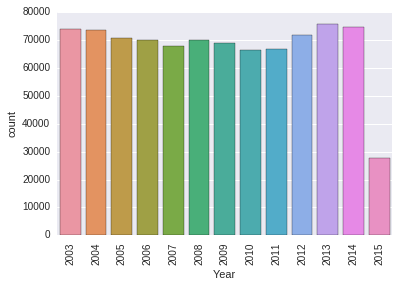

In [79]:
fig = sns.countplot(x="Year", data=sfcrime)
_ = plt.xticks(rotation=90)

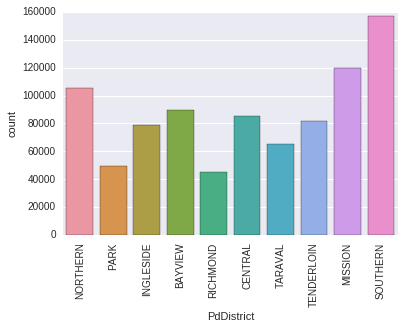

In [80]:
fig = sns.countplot(x="PdDistrict", data=sfcrime)
_ = plt.xticks(rotation=90)

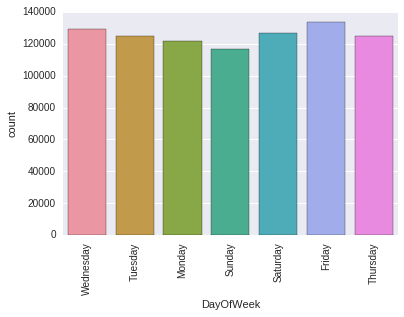

In [81]:
fig = sns.countplot(x="DayOfWeek", data=sfcrime)
_ = plt.xticks(rotation=90)

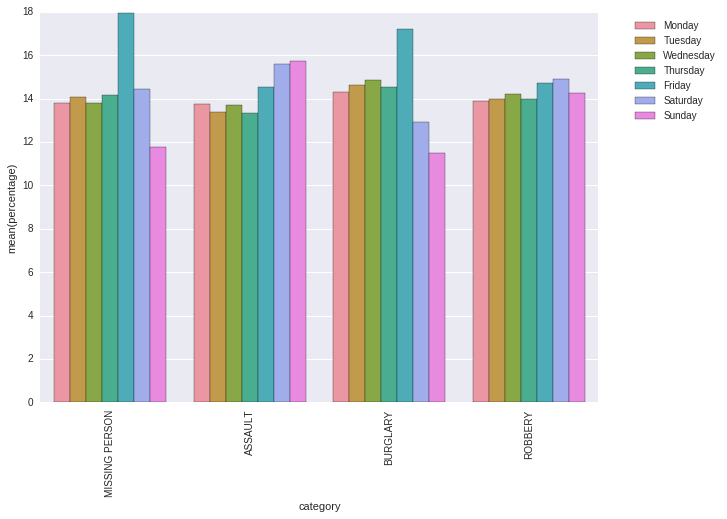

In [82]:
# cat_subset = sfcrime["Category"].unique()[0:4]
cat_subset = ["ASSAULT", "BURGLARY", "MISSING PERSON", "ROBBERY"]

grouped = sfcrime.groupby(['Category'], sort=False)

weekday_counts = grouped['DayOfWeek'].value_counts(normalize=True, sort=False)

weekday_data = [
    {'category': category, 'DayOfWeek': DayOfWeek, 'percentage': percentage*100} 
    for (category, DayOfWeek), percentage in dict(weekday_counts).items() if category in cat_subset
]

df_weekday = pandas.DataFrame(weekday_data)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

p = plt.figure(figsize=(10,7))
p = sns.barplot(x='category', y='percentage', hue='DayOfWeek', data=df_weekday, hue_order=weekday_order)
_ = plt.setp(p.get_xticklabels(), rotation=90) 
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### TODO

* Refactor the relative frequency barplot code into a helper function 
* Try plotting the residuals over time and see if there are any "outlier"s
* Layers of time
* Maps/GIS?

In [83]:
# NEW FEATURE: WeekdayNumber

sfcrime['WeekdayNumber'] = sfcrime['DayOfWeek']
sfcrime.loc[sfcrime["DayOfWeek"] == "Monday", "WeekdayNumber"] = 1
sfcrime.loc[sfcrime["DayOfWeek"] == "Tuesday", "WeekdayNumber"] = 2
sfcrime.loc[sfcrime["DayOfWeek"] == "Wednesday", "WeekdayNumber"] = 3
sfcrime.loc[sfcrime["DayOfWeek"] == "Thursday", "WeekdayNumber"] = 4
sfcrime.loc[sfcrime["DayOfWeek"] == "Friday", "WeekdayNumber"] = 5
sfcrime.loc[sfcrime["DayOfWeek"] == "Saturday", "WeekdayNumber"] = 6
sfcrime.loc[sfcrime["DayOfWeek"] == "Sunday", "WeekdayNumber"] = 7

In [84]:
# NEW FEATURE: PdDistrictNumber

sfcrime['PdDistrictNumber'] = sfcrime['PdDistrict']
sfcrime.loc[sfcrime["PdDistrict"] == "NORTHERN", "PdDistrictNumber"] = 1
sfcrime.loc[sfcrime["PdDistrict"] == "PARK", "PdDistrictNumber"] = 2
sfcrime.loc[sfcrime["PdDistrict"] == "INGLESIDE", "PdDistrictNumber"] = 3
sfcrime.loc[sfcrime["PdDistrict"] == "BAYVIEW", "PdDistrictNumber"] = 4
sfcrime.loc[sfcrime["PdDistrict"] == "RICHMOND", "PdDistrictNumber"] = 5
sfcrime.loc[sfcrime["PdDistrict"] == "CENTRAL", "PdDistrictNumber"] = 6
sfcrime.loc[sfcrime["PdDistrict"] == "TARAVAL", "PdDistrictNumber"] = 7
sfcrime.loc[sfcrime["PdDistrict"] == "TENDERLOIN", "PdDistrictNumber"] = 8
sfcrime.loc[sfcrime["PdDistrict"] == "MISSION", "PdDistrictNumber"] = 9
sfcrime.loc[sfcrime["PdDistrict"] == "SOUTHERN", "PdDistrictNumber"] = 10

In [85]:
sfcrime_warrants = sfcrime[sfcrime['Category'] == 'WARRANTS']

In [86]:
# # example from seaborn website
# iris = sns.load_dataset("iris")
# g = sns.pairplot(iris)

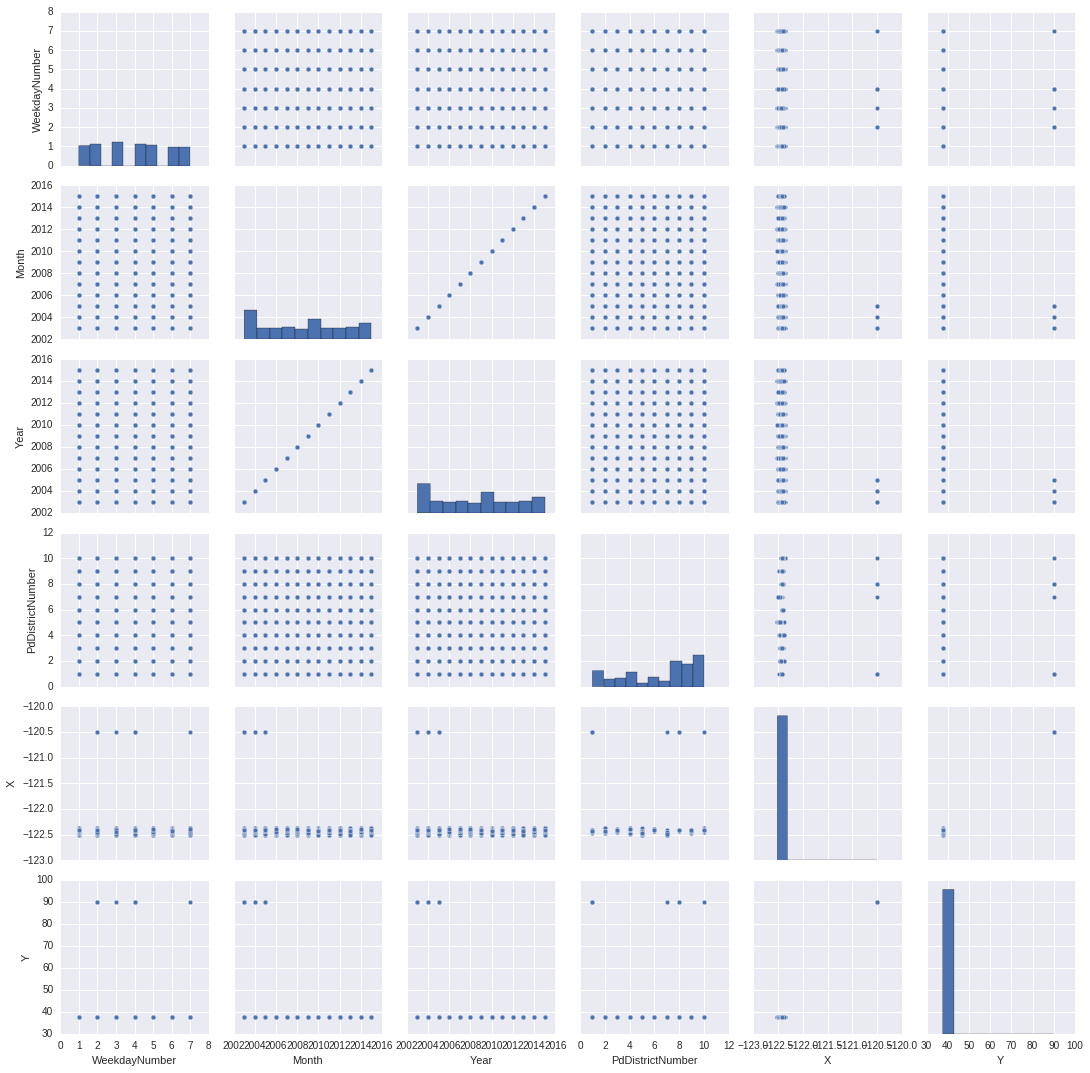

In [87]:
pp = sns.pairplot(sfcrime_warrants, vars=['WeekdayNumber', 'Month', 'Year', 'PdDistrictNumber', 'X', 'Y'])
# pp.set(xlim=(0, 10), ylim=(0, 10))